In [1]:
import numpy as np
import matplotlib.pyplot as plt
# !pip install cv2
import os
import cv2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [64]:
DATADIR = "dataset"
Classes = ['with_mask', 'without_mask']
Class_dict = {'with_mask':1, 'without_mask':0}
img_size = 100

data = []

data_path = []

target = []

# DATADIR = "dataset/"
IMAGE_SIZE = 32

for category in Classes:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        image_path = os.path.join(path,img)
        try:
            img_array = cv2.imread(image_path)
            resized=cv2.resize(img_array,(img_size,img_size))
            data.append(resized)
            target.append(Class_dict[category])
            
#         print((img_array))
        # print(os.path.join(path,img))
#         gray=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
        except Exception as e:
            pass
#         data.append(resized)





In [65]:
np.array(data).shape, np.array(target).shape

((3833, 100, 100, 3), (3833,))

In [66]:
np.save('X_mask',data)
np.save('y_mask',target)

In [69]:
from tensorflow import keras

model = keras.models.load_model('mask_detection')

(1, 100, 100, 3)

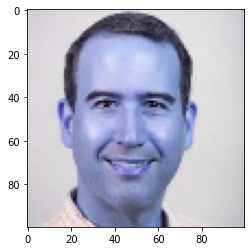

In [84]:
test_img = cv2.imread('download.jpg')
test_img_resized = cv2.resize(test_img,(100,100))
test_img_reshaped = np.reshape(test_img_resized,(1,100,100,3))
normalized = test_img_reshaped / 255
plt.imshow(normalized[0])
normalized.shape

In [85]:
np.argmax(model.predict(normalized))

0